# Main Libraries for the Project

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
#Beth Computer Location File
#trainData = pd.read_csv("/Users/bethanydanner/Google_Drive/documents/python_code/clustering-based-anomaly-detection/Dataset/NSL-KDD/KDDTrain+.csv", header = None)
#testData = pd.read_csv("/Users/bethanydanner/Google_Drive/documents/python_code/clustering-based-anomaly-detection/Dataset/NSL-KDD/KDDTest+.csv", header = None)

# Reading the  Train Dataset and Checking if has missing Values

In [2]:
trainData = pd.read_csv("/Users/jeremyperez/Jupyter/NSL-KDD/KDDTrain+.csv", header = None) 
#Run a Missing Value Ratio test to determine if any feature is missing values.
#If all ratios = 0.0, then data is not missing any values for any features.

#More info about Missing value ratio at 
#https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/

trainData.isnull().sum()/len(trainData)*100

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
40    0.0
41    0.0
42    0.0
dtype: float64

# Reading the  Test Dataset and Checking if has missing Values

In [3]:
testData = pd.read_csv("/Users/jeremyperez/Jupyter/NSL-KDD/KDDTest+.csv", header = None)
#Run a Missing Value Ratio test to determine if any feature is missing values.
#If all ratios = 0.0, then data is not missing any values for any features.
testData.isnull().sum()/len(testData)*100

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
40    0.0
41    0.0
42    0.0
dtype: float64

# Getting the Dependent and independent Variables

In [4]:
X = trainData.iloc[:,:-1].values # Get all the rows and all the clums except all the colums - 1
Y = trainData.iloc[:,42].values# Get all the rows and the colum number 42
A = testData.iloc[:,:-1].values # Get all the rows and all the clums except all the colums - 1
Z = testData.iloc[:,42].values# Get all the rows and the colum number 42
attacks = trainData.iloc[:,42].values #Attacks with no one hot encoding

X = pd.DataFrame(X)
Y = pd.DataFrame(Y)
A = pd.DataFrame(A)
Z = pd.DataFrame(Z)

# Encoding Categorical Data for Train Set

In [5]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
#We use One hot encoding to pervent the machine learning to atribute the categorical data in order. 
#What one hot encoding(ColumnTransformer) does is, it takes a column which has categorical data, 
#which has been label encoded, and then splits the column into multiple columns.
#The numbers are replaced by 1s and 0s, depending on which column has what value
#We don't need to do a label encoded step because ColumnTransformer do one hot encode and label encode!

#Encoding the Independient Variable
transformX = ColumnTransformer([("Servers", OneHotEncoder(categories = "auto"), [1,2,3])], remainder="passthrough")
X = transformX.fit_transform(X)
#Encoding the Dependent Variable
transformY= ColumnTransformer([("Attacks", OneHotEncoder(categories = "auto"), [0])], remainder="passthrough")
Y = transformY.fit_transform(Y)

# Encoding Categorical Data for Test Set

In [6]:
#Encoding the Independient Variable
transformA = ColumnTransformer([("Servers", OneHotEncoder(categories = "auto"), [1,2,3])], remainder="passthrough")
A = transformA.fit_transform(A)
    
#Encoding the Dependent Variable
transformZ = ColumnTransformer([("Attacks", OneHotEncoder(categories = "auto"), [0])], remainder="passthrough")
Z = transformZ.fit_transform(Z)

# Scaling the data with Standard Scaling

In [7]:
#Because we are using numerical-value-only clustering techniques to analyze the NSL-KDD dataset,
#we need to normalize the values in the dataset, as Ibrahim., et. al. describe (page 112).
#We complete the normalization process below:
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression

normalizer = Normalizer().fit(X)
trainX = normalizer.transform(X)

normalizer = Normalizer().fit(A)
testA = normalizer.transform(A)


trainData = np.array(trainX)
trainLabel =np.array(Y)

testData =  np.array(testA)
testLabel = np.array(Z)

#model = LogisticRegression(solver = 'lbfgs')
#model.fit(trainData,trainLabel)

# Elbow Method 

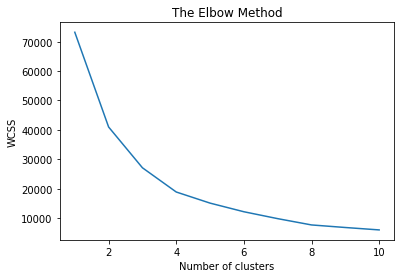

In [8]:
#Elbow method to find the best number of culster
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300,n_init = 10,random_state = 0)
    kmeans.fit(trainData)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
#5 clusters 

# KMeans

In [9]:
#Applying K-mea(n_clusters = 5)
KMEANS = KMeans(n_clusters = 4, init = 'k-means++',max_iter = 300,n_init = 10,random_state = 0)
kmeans = KMEANS.fit(trainData)
kmeans.labels_

array([2, 1, 1, ..., 2, 1, 1], dtype=int32)

# Analyzing Results by Crosstab

In [10]:
pd.crosstab(attacks,kmeans.labels_)

col_0,0,1,2,3
row_0,,,,
back,0,0,956,0
buffer_overflow,30,0,0,0
ftp_write,4,0,2,2
guess_passwd,53,0,0,0
imap,2,0,1,8
ipsweep,42,402,64,3091
land,0,3,0,15
loadmodule,9,0,0,0
multihop,6,0,1,0


# Analyzing Results by Graph

In [11]:
#Visual representation of the clusters
#plt.scatter(X[y_kmeans ==0,0],X[y_kmeans == 0,1], s = 21, c = 'red', label = 'cluster1')
#plt.scatter(X[y_kmeans ==1,0],X[y_kmeans == 1,1], s = 21, c = 'yellow', label = 'cluster2')
#plt.scatter(X[y_kmeans ==2,0],X[y_kmeans == 2,1], s = 21, c = 'cyan', label = 'cluster3')
#plt.scatter(X[y_kmeans ==3,0],X[y_kmeans == 3,1], s = 21, c = 'orange', label = 'cluster4')
#plt.scatter(X[y_kmeans ==4,0],X[y_kmeans == 4,1], s = 21, c = 'black', label = 'cluster5')
#plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1],s = 300, c = 'purple', label = 'Centroids')
#plt.title('Clusters of Attacks')
#plt.xlabel('Numbers of Attacks')
#plt.ylabel('Types of Attacks')
#plt.legend()
#plt.show()

# DBSCAN 

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score
#OPTICS
# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(trainData)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

pd.crosstab(attacks,labels)


# F-Score implementation

In [ ]:
from sklearn.metrics import f1_score

fscore = f1_score(X,Y).fit(X)
print(fscore)